In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import datetime
from pathlib import Path

/home/saketh/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
from classes.salesAnalyzer import LSTM
from classes.weatherAnalyzer import LSTM1

In [222]:
def sliding_windows(data, seq_length):
    x = []

    for i in range(len(data)-seq_length):
        _x = data[i:(i+seq_length)]
        x.append(_x)
    
    return np.array(x)

In [399]:
def RMSE(data_predict,dataY_plot):
    c = 0
    for i in range(len(data_predict)):
        c = c + abs(data_predict[i][0] - dataY_plot[i][0]) ** 2
    
    return (c ** 0.5)/len(data_predict)

In [464]:
store = 1

In [491]:
for day in range(1000):
    if Path("./_config/sales/store-{}.csv".format(store)).is_file():
        print("Datafile exists")
        training_set = pd.read_csv("./_config/sales/store-{}.csv".format(store))
        training_set_values = training_set.iloc[:,0:1].values
    else:
        print("Creating New Datafile")
        dataset = pd.read_csv("./LSTM - Sales Pattern Analyzer/datasets/model-1/training-1.csv")
        training_set = dataset[dataset["SCRUB_STORE_NO"] == store]
        temp = training_set.iloc[:,2:3].copy()
        temp.to_csv("./_config/sales/store-{}.csv".format(store),index=False)
        training_set_values = training_set.iloc[:,2:3].values

    PATH = "./LSTM - Sales Pattern Analyzer/saved-models/model-1/saved_model_store_{}.pth".format(store)
    lstm1 = LSTM()
    lstm1.load_state_dict(torch.load(PATH))
    lstm1.eval()



    sc = MinMaxScaler()
    training_data = sc.fit_transform(training_set_values)

    seq_length = 14
    x = sliding_windows(training_data, seq_length)


    dataX = Variable(torch.Tensor(np.array(x)))

    lstm1_dataX =  dataX
    print("Shape of the data : {}".format(lstm1_dataX.shape))

    train_predict = lstm1(lstm1_dataX)

    data_predict = train_predict.data.numpy()

    data_predict = sc.inverse_transform(data_predict)

    temp = data_predict.reshape(-1).tolist()
    predictions = [int(i) for i in temp]

    temp = dataset.copy()
    originals = training_set_values.reshape(-1).tolist()
    plotY = originals[14:]

    print("RMSE of validation set: {}".format(RMSE([predictions],[plotY])))


#     plt.plot(plotY)
#     plt.plot(predictions)
#     plt.suptitle('Prediction')
#     plt.show()

    training_set.loc[len(training_set)] = [predictions[-1]]
    training_set.to_csv("./_config/sales/store-{}.csv".format(store),index=False)
    originals = pd.read_csv("./_config/sales/store-{}.csv".format(store))
    originals = originals.iloc[:,0:1].values
    originals = originals.reshape(-1).tolist()


Datafile exists
Shape of the data : torch.Size([1623, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1624, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1625, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1626, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1627, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1628, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1629, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1630, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1631, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1632, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1633, 14, 1])
RMSE of validation

RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1713, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1714, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1715, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1716, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1717, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1718, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1719, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1720, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1721, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1722, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([17

Shape of the data : torch.Size([1805, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1806, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1807, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1808, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1809, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1810, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1811, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1812, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1813, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1814, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1815, 14, 1])
RMSE of validation set: 571.0
Data

RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1898, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1899, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1900, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1901, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1902, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1903, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1904, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1905, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1906, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1907, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([19

RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1989, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1990, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1991, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1992, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1993, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1994, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1995, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1996, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1997, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([1998, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([19

RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2079, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2080, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2081, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2082, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2083, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2084, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2085, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2086, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2087, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2088, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([20

RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2169, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2170, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2171, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2172, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2173, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2174, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2175, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2176, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2177, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2178, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([21

RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2260, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2261, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2262, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2263, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2264, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2265, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2266, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2267, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2268, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2269, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([22

RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2351, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2352, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2353, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2354, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2355, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2356, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2357, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2358, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2359, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2360, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([23

RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2442, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2443, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2444, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2445, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2446, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2447, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2448, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2449, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2450, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2451, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([24

Datafile exists
Shape of the data : torch.Size([2533, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2534, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2535, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2536, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2537, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2538, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2539, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2540, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2541, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2542, 14, 1])
RMSE of validation set: 571.0
Datafile exists
Shape of the data : torch.Size([2543, 14, 1])
RMSE of validation

# Weather Analyzer

In [186]:
forecast = pd.read_csv("./LSTM - Weather Sales Forecast/datasets/forecasting.csv")

merged = pd.read_csv("./LSTM - Weather Sales Forecast/datasets/merged.csv")
training_dataset = pd.read_csv("./LSTM - Weather Sales Forecast/datasets/training.csv")

In [187]:
store = 1 

In [188]:
cols = ['DOY_STD',
       'AVG_OF__DAILY_AVG_TEMPERATURE_AIR_F',
       'AVG_OF__DAILY_AVG_TEMPERATURE_WETBULB_F',
       'AVG_OF__DAILY_AVG_TEMPERATURE_DEWPOINT_F',
       'AVG_OF__DAILY_AVG_TEMPERATURE_FEELSLIKE_F',
       'AVG_OF__DAILY_AVG_HUMIDITY_RELATIVE_PCT',
       'AVG_OF__DAILY_AVG_HUMIDITY_SPECIFIC_GPKG',
       'AVG_OF__DAILY_AVG_PRESSURE_SURFACE_MB',
       'AVG_OF__DAILY_AVG_PRESSURE_MEAN_SEA_LEVEL_MB',
       'AVG_OF__DAILY_AVG_WIND_SPEED_10M_MPH',
       'AVG_VEC_OF__DAILY_AVG_VEC_WIND_DIRECTION_10M_DEG',
       'AVG_VEC_OF__DAILY_AVG_VEC_WIND_DIRECTION_80M_DEG',
       'AVG_VEC_OF__DAILY_AVG_VEC_WIND_DIRECTION_100M_DEG',
       'AVG_OF__POS_DAILY_TOT_PRECIPITATION_IN',
       'AVG_OF__POS_DAILY_TOT_SNOWFALL_IN',
       'AVG_OF__DAILY_AVG_CLOUD_COVER_TOT_PCT',
       'AVG_OF__DAILY_AVG_RADIATION_SOLAR_TOTAL_WPM2',
       'AVG_OF__DAILY_TOT_RADIATION_SOLAR_TOTAL_WPM2']

_____STORE NUM. 1_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


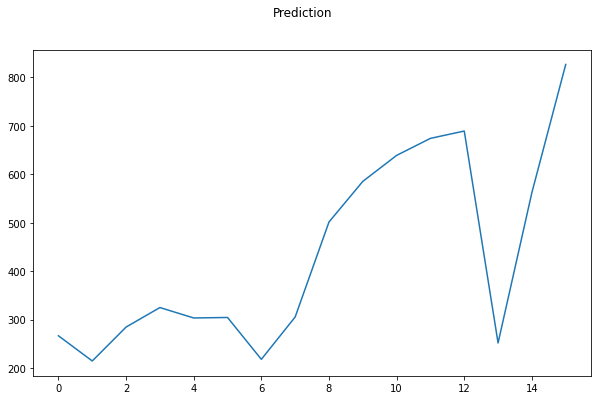

_____STORE NUM. 2_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


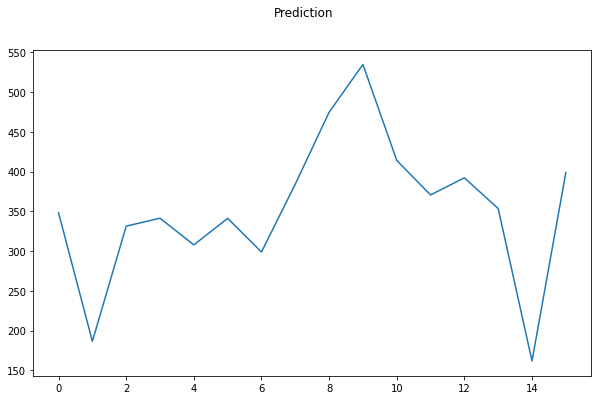

_____STORE NUM. 3_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


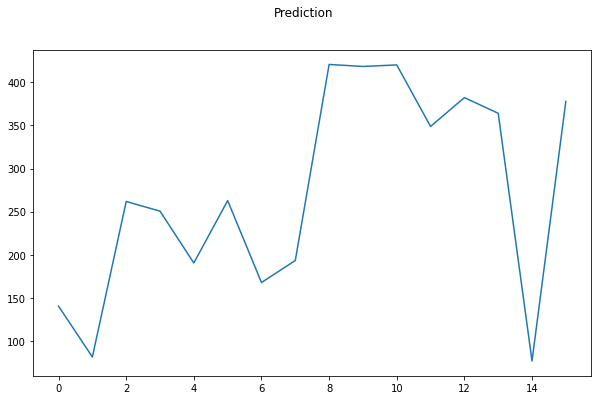

_____STORE NUM. 4_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


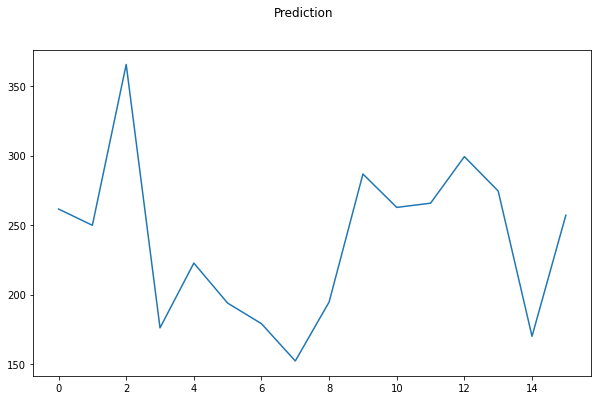

_____STORE NUM. 5_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


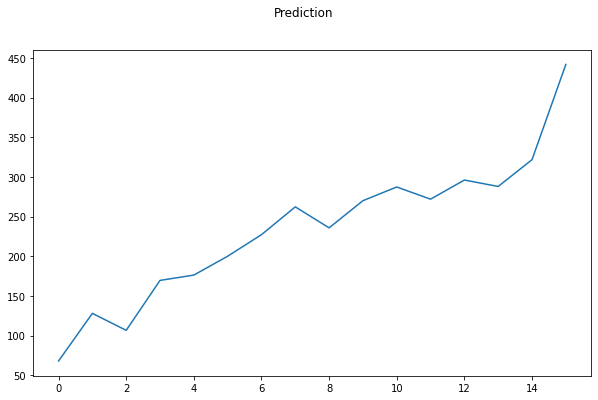

_____STORE NUM. 6_____
data Shape torch.Size([15, 1, 19])
Shape of data predicted (15, 1)


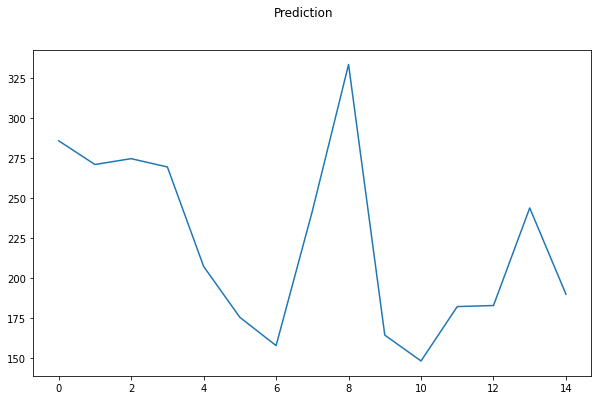

_____STORE NUM. 7_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


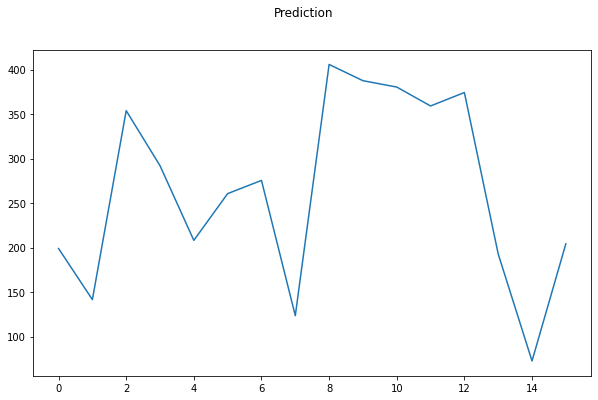

_____STORE NUM. 8_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


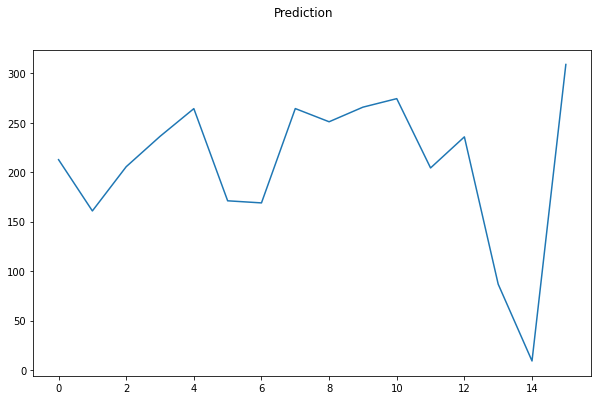

_____STORE NUM. 9_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


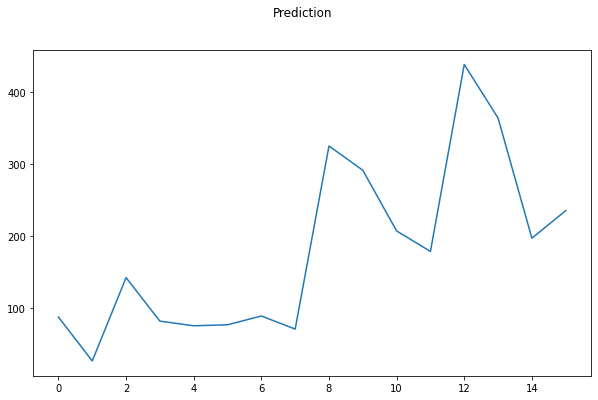

_____STORE NUM. 10_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


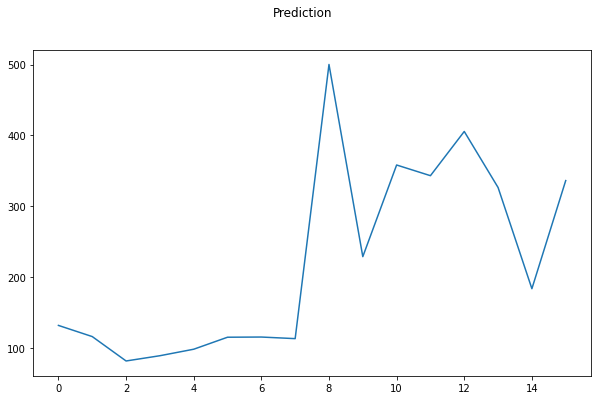

_____STORE NUM. 11_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


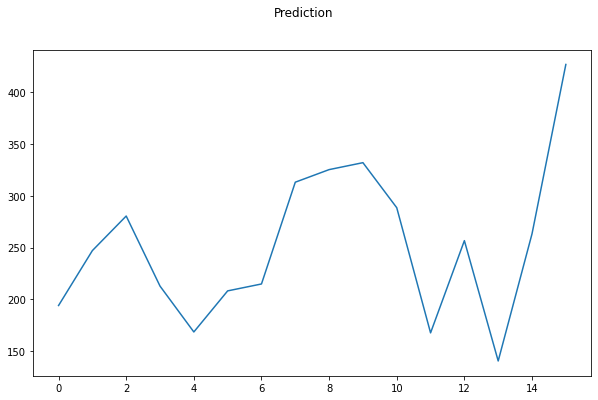

_____STORE NUM. 12_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


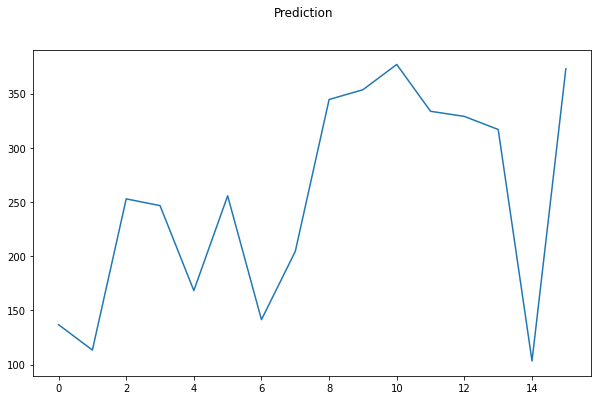

_____STORE NUM. 13_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


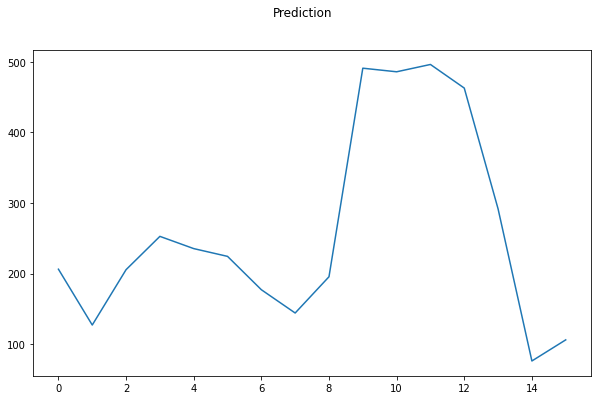

_____STORE NUM. 14_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


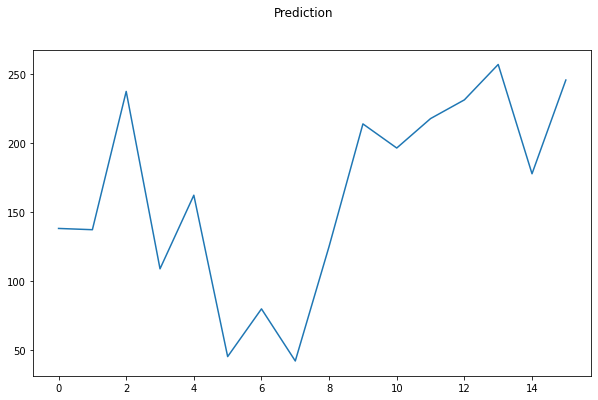

_____STORE NUM. 15_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


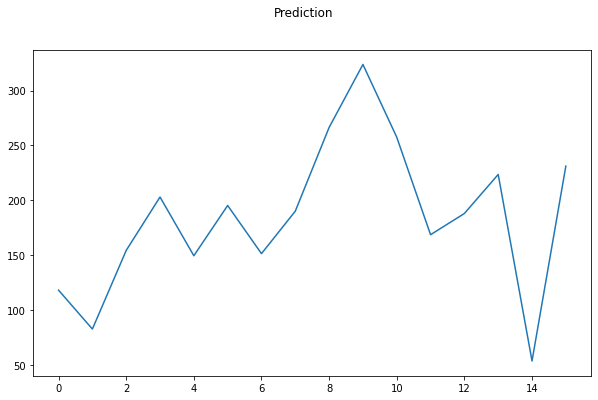

_____STORE NUM. 16_____
data Shape torch.Size([15, 1, 19])
Shape of data predicted (15, 1)


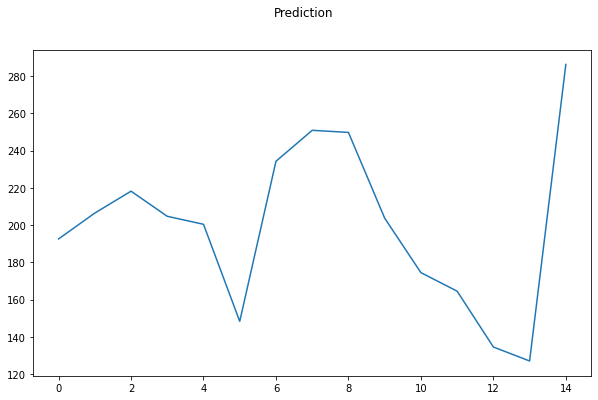

_____STORE NUM. 17_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


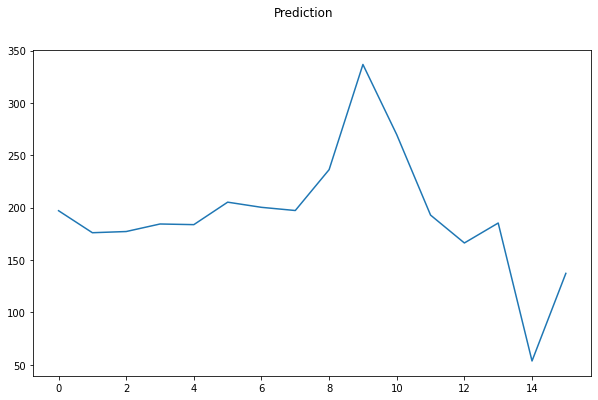

_____STORE NUM. 18_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


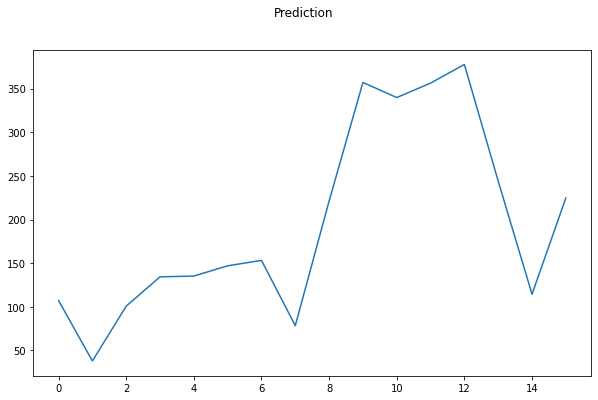

_____STORE NUM. 19_____
data Shape torch.Size([15, 1, 19])
Shape of data predicted (15, 1)


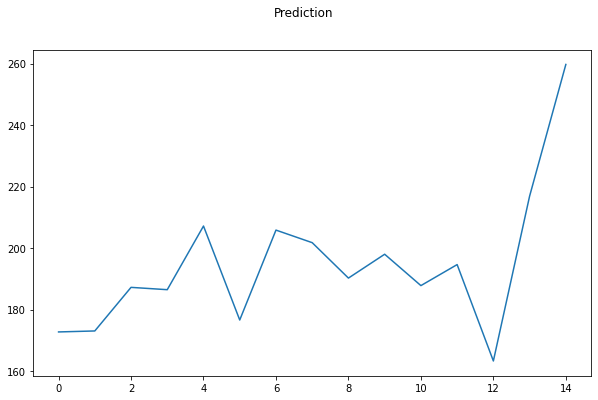

_____STORE NUM. 20_____
data Shape torch.Size([16, 1, 19])
Shape of data predicted (16, 1)


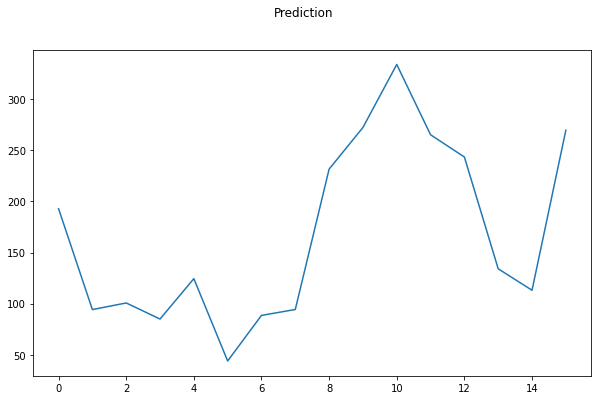

In [189]:
for store in range(1,21):
    print("_____STORE NUM. {}_____".format(store))
    
    PATH = "./LSTM - Weather Sales Forecast/saved-models/model-1/saved_model_store_{}.pth".format(store)
    lstm2 = LSTM1()
    lstm2.load_state_dict(torch.load(PATH))
    lstm2.eval()
    training = pd.read_csv("./LSTM - Weather Sales Forecast/datasets/merged.csv")
    training = training[training["SCRUB_STORE_NO"] == store].iloc[:,2:3]
    
    copy_dataset = forecast.copy()
    copy_dataset = copy_dataset[copy_dataset["SCRUB_STORE_NO"] == store].iloc[:,2:]


    X = copy_dataset
    y = training

    mm = MinMaxScaler()
    ss = StandardScaler()

    X_ss = ss.fit_transform(X)
    y_mm = mm.fit_transform(y)

    data_X = Variable(torch.Tensor(X_ss))

    data_X_tensors = torch.reshape(data_X,   (data_X.shape[0], 1, data_X.shape[1]))
    print("data Shape", data_X_tensors.shape) 

    outputs = lstm2(data_X_tensors)


    data_predict = outputs.data.numpy()
    data_predict = mm.inverse_transform(data_predict)

    print("Shape of data predicted {}".format(data_predict.shape))


    plt.figure(figsize=(10,6))

    plt.plot(data_predict)
    plt.suptitle('Prediction')
    plt.show()
    
    copy_dataset["FORECAST"] = data_predict.astype(int)
    copy_dataset.to_csv("./predictions/weatherAnalyzer/forecast/store_{}.csv".format(store),index=False)


_____STORE NUM. 1_____
data Shape torch.Size([1636, 1, 19])
Shape of data predicted (1636, 1)


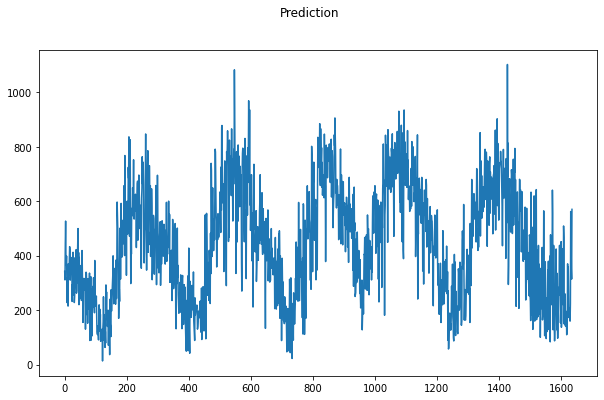

_____STORE NUM. 2_____
data Shape torch.Size([1488, 1, 19])
Shape of data predicted (1488, 1)


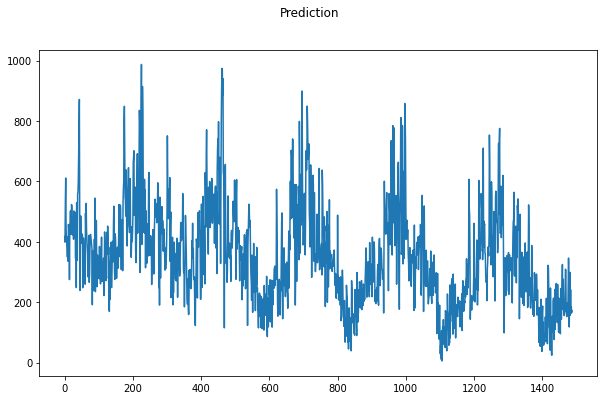

_____STORE NUM. 3_____
data Shape torch.Size([1608, 1, 19])
Shape of data predicted (1608, 1)


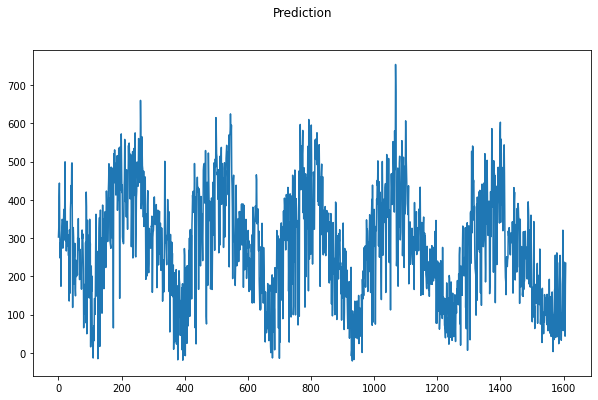

_____STORE NUM. 4_____
data Shape torch.Size([1641, 1, 19])
Shape of data predicted (1641, 1)


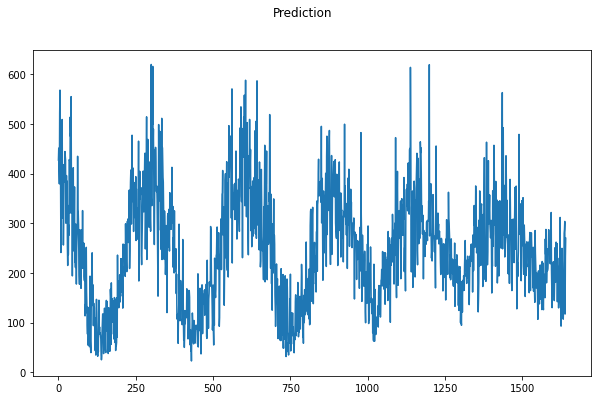

_____STORE NUM. 5_____
data Shape torch.Size([1575, 1, 19])
Shape of data predicted (1575, 1)


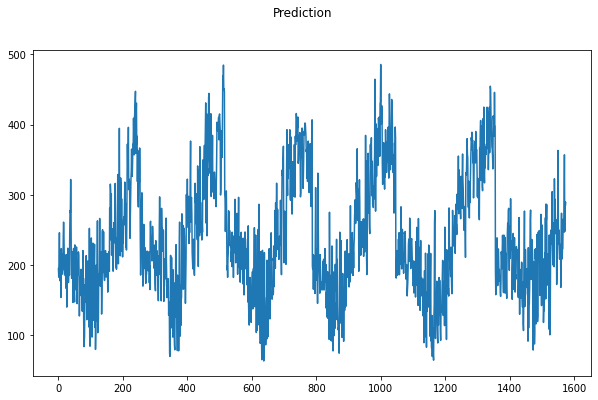

_____STORE NUM. 6_____
data Shape torch.Size([1646, 1, 19])
Shape of data predicted (1646, 1)


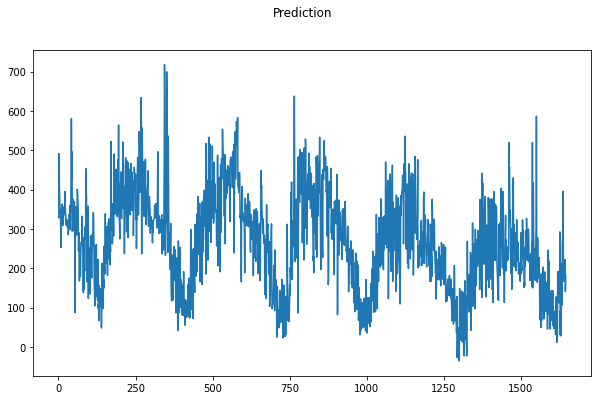

_____STORE NUM. 7_____
data Shape torch.Size([1601, 1, 19])
Shape of data predicted (1601, 1)


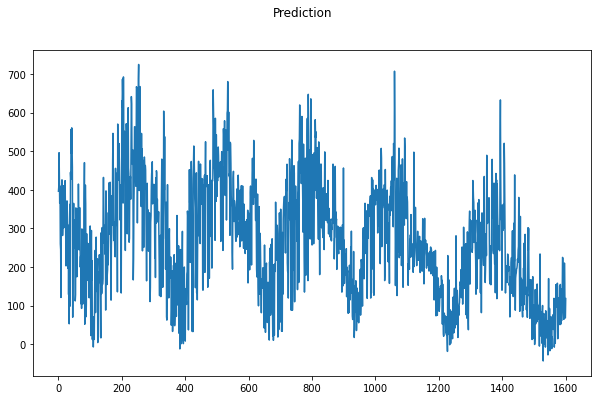

_____STORE NUM. 8_____
data Shape torch.Size([1450, 1, 19])
Shape of data predicted (1450, 1)


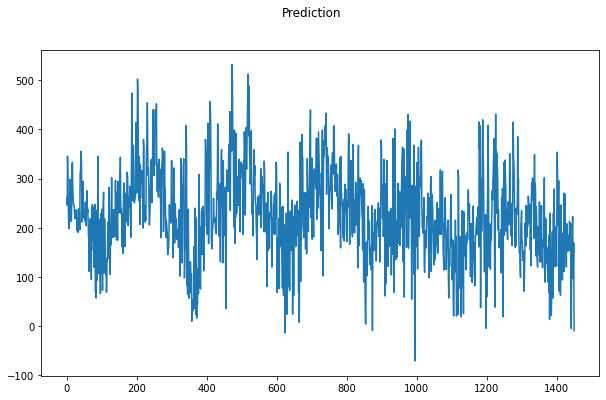

_____STORE NUM. 9_____
data Shape torch.Size([1567, 1, 19])
Shape of data predicted (1567, 1)


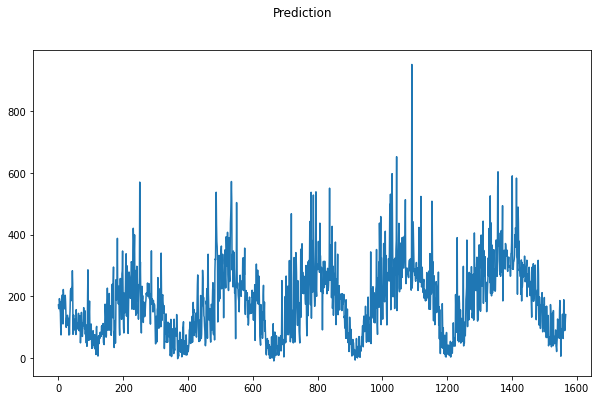

_____STORE NUM. 10_____
data Shape torch.Size([1629, 1, 19])
Shape of data predicted (1629, 1)


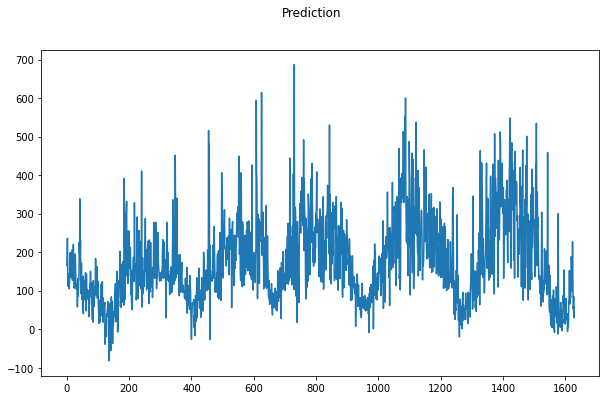

_____STORE NUM. 11_____
data Shape torch.Size([1415, 1, 19])
Shape of data predicted (1415, 1)


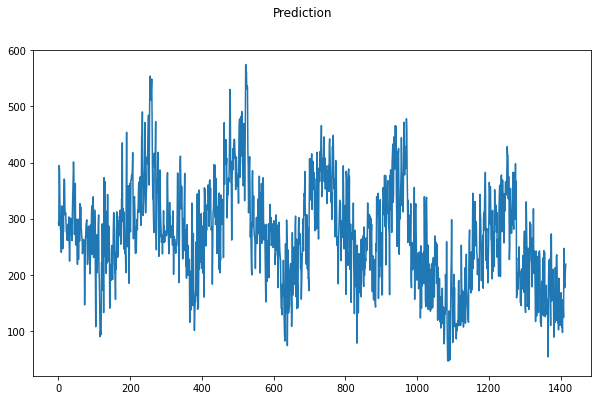

_____STORE NUM. 12_____
data Shape torch.Size([1657, 1, 19])
Shape of data predicted (1657, 1)


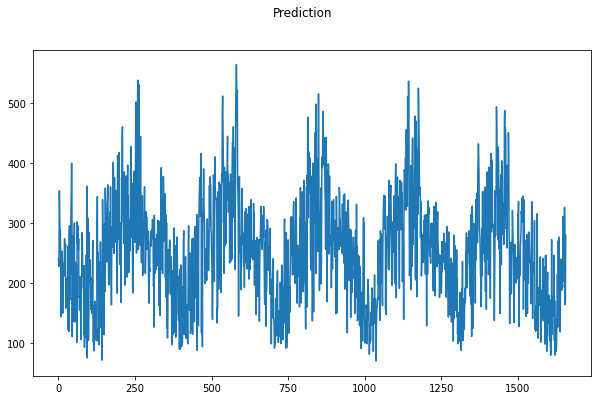

_____STORE NUM. 13_____
data Shape torch.Size([1558, 1, 19])
Shape of data predicted (1558, 1)


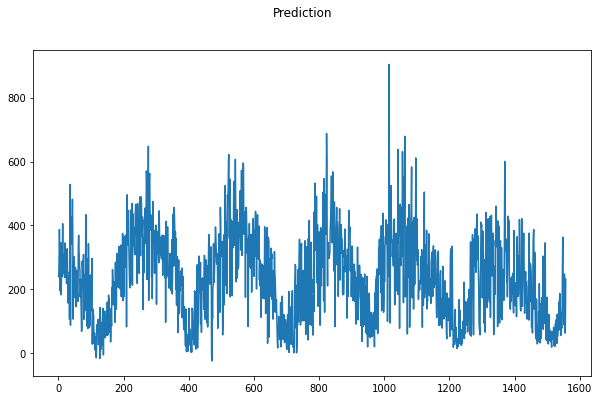

_____STORE NUM. 14_____
data Shape torch.Size([1575, 1, 19])
Shape of data predicted (1575, 1)


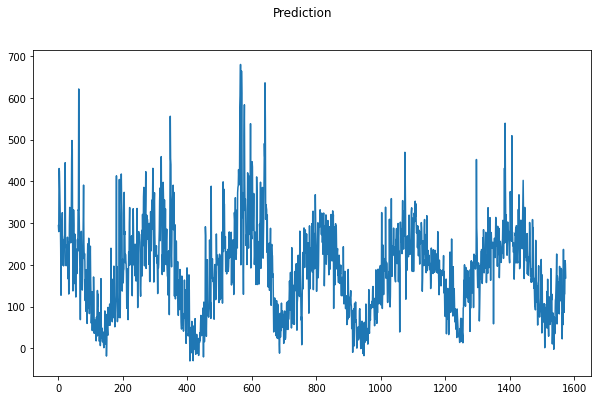

_____STORE NUM. 15_____
data Shape torch.Size([1593, 1, 19])
Shape of data predicted (1593, 1)


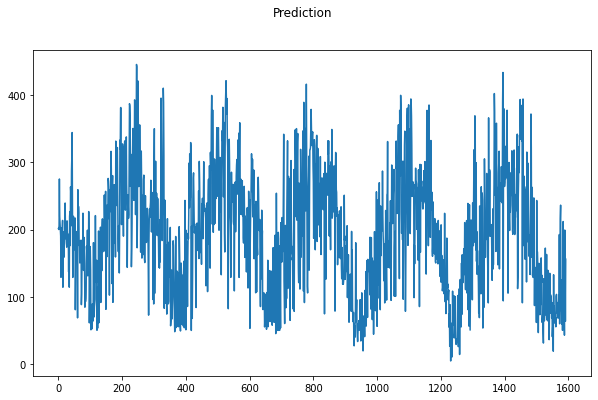

_____STORE NUM. 16_____
data Shape torch.Size([1572, 1, 19])
Shape of data predicted (1572, 1)


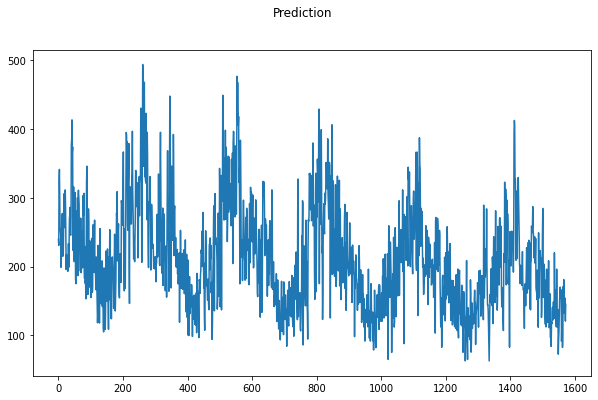

_____STORE NUM. 17_____
data Shape torch.Size([1617, 1, 19])
Shape of data predicted (1617, 1)


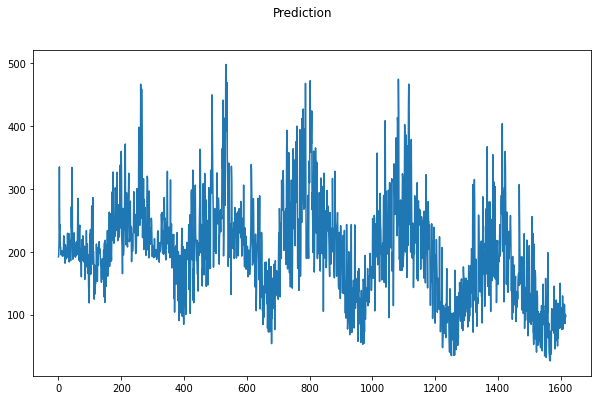

_____STORE NUM. 18_____
data Shape torch.Size([1601, 1, 19])
Shape of data predicted (1601, 1)


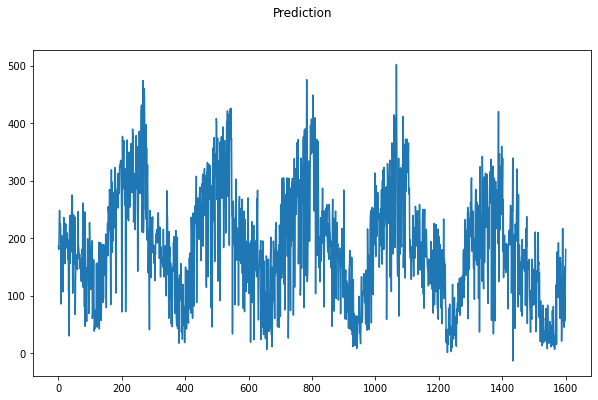

_____STORE NUM. 19_____
data Shape torch.Size([1425, 1, 19])
Shape of data predicted (1425, 1)


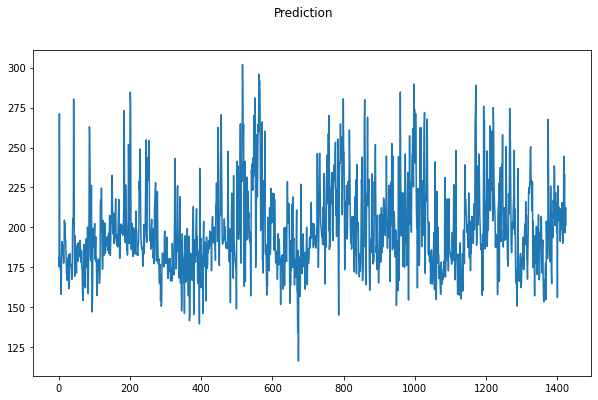

_____STORE NUM. 20_____
data Shape torch.Size([1467, 1, 19])
Shape of data predicted (1467, 1)


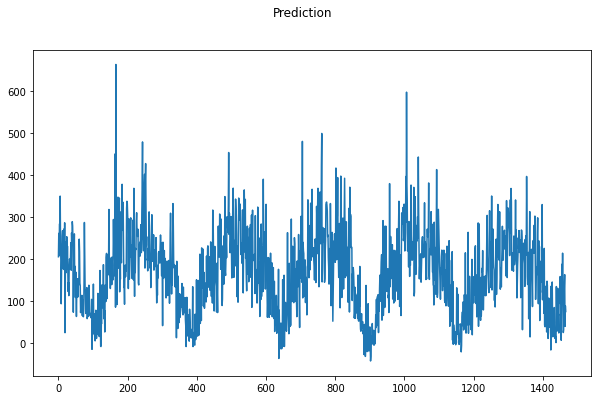

In [190]:

for store in range(1,21):
    print("_____STORE NUM. {}_____".format(store))
    
    PATH = "./LSTM - Weather Sales Forecast/saved-models/model-1/saved_model_store_{}.pth".format(store)
    lstm2 = LSTM1()
    lstm2.load_state_dict(torch.load(PATH))
    lstm2.eval()
    training = pd.read_csv("./LSTM - Weather Sales Forecast/datasets/merged.csv")
    training = training[training["SCRUB_STORE_NO"] == store].iloc[:,2:3]
    
    copy_dataset = training_dataset[training_dataset["SCRUB_STORE_NO"] == store].iloc[:,3:].copy()
    

    X = copy_dataset
    y = training

    mm = MinMaxScaler()
    ss = StandardScaler()

    X_ss = ss.fit_transform(X)
    y_mm = mm.fit_transform(y)

    data_X = Variable(torch.Tensor(X_ss))

    data_X_tensors = torch.reshape(data_X,   (data_X.shape[0], 1, data_X.shape[1]))
    print("data Shape", data_X_tensors.shape) 

    outputs = lstm2(data_X_tensors)


    data_predict = outputs.data.numpy()
    data_predict = mm.inverse_transform(data_predict)

    print("Shape of data predicted {}".format(data_predict.shape))


    plt.figure(figsize=(10,6))

    plt.plot(data_predict)
    plt.suptitle('Prediction')
    plt.show()
    
    copy_dataset["FORECAST"] = data_predict.astype(int)
    copy_dataset.to_csv("./predictions/weatherAnalyzer/total/store_{}.csv".format(store),index=False)


# Sales Analyzer

_____STORE NUM. 1_____


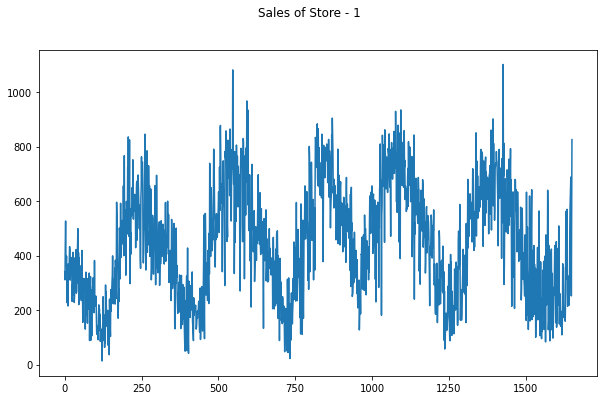

(1652, 1)


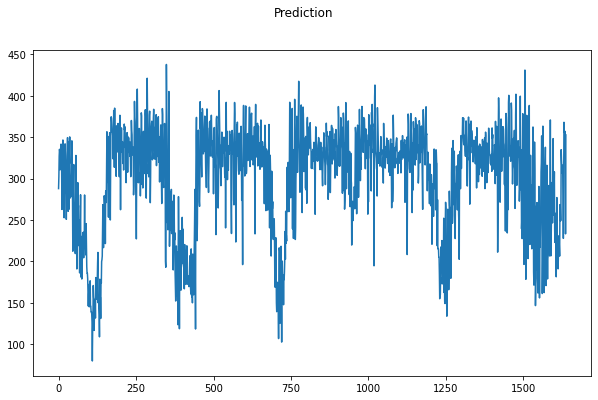

(1638, 20) (1638, 1)
_____STORE NUM. 2_____


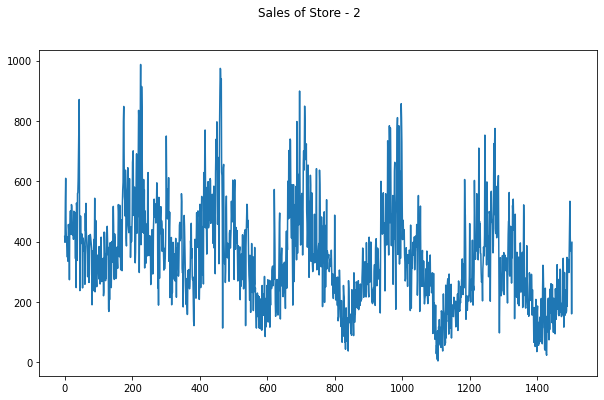

(1504, 1)


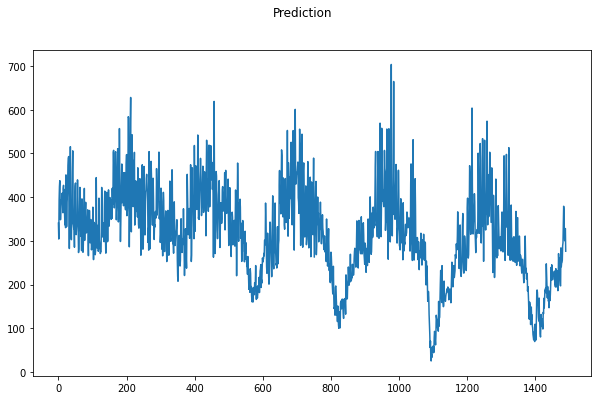

(1490, 20) (1490, 1)
_____STORE NUM. 3_____


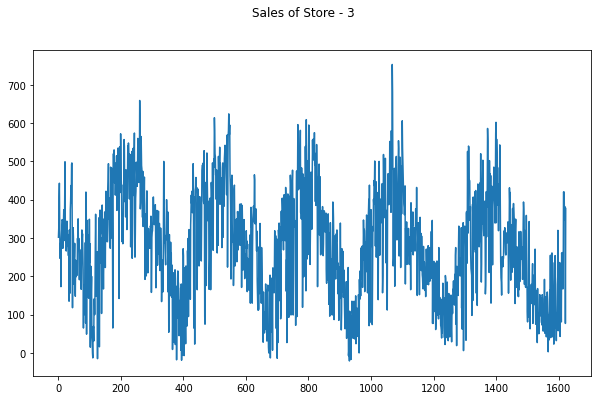

(1624, 1)


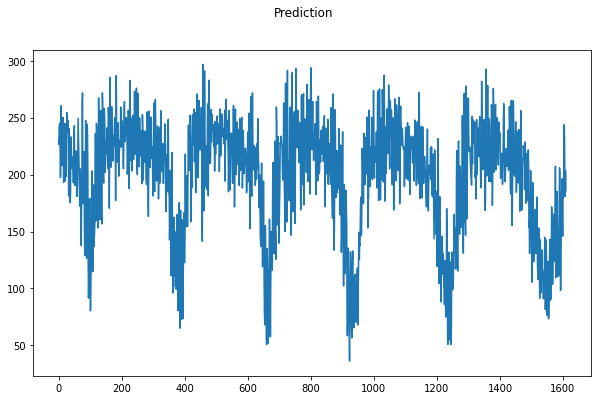

(1610, 20) (1610, 1)
_____STORE NUM. 4_____


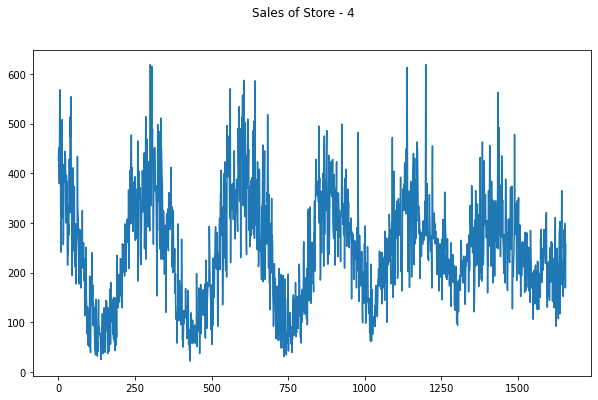

(1657, 1)


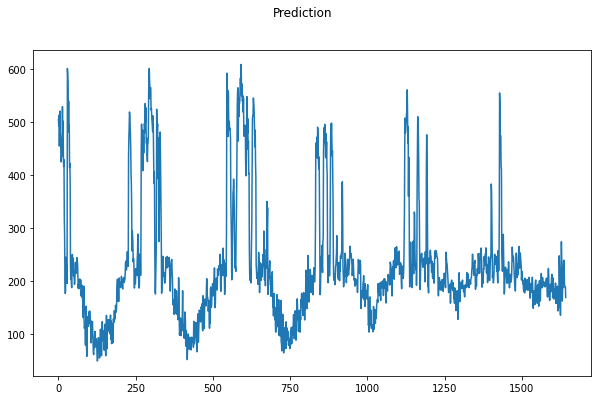

(1643, 20) (1643, 1)
_____STORE NUM. 5_____


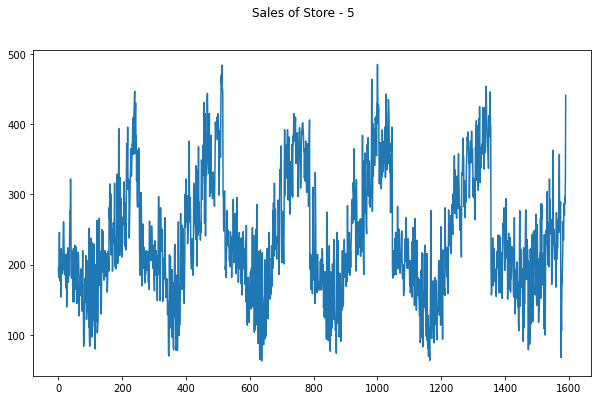

(1591, 1)


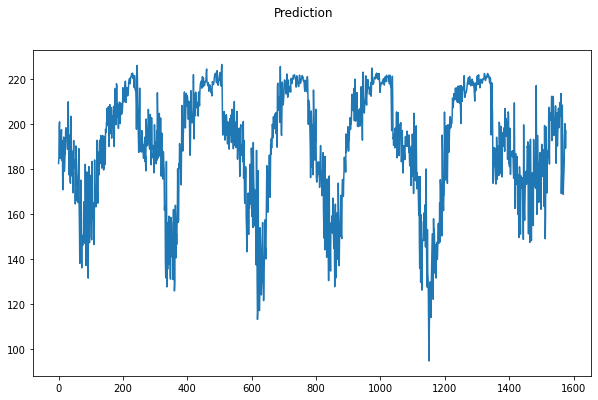

(1577, 20) (1577, 1)
_____STORE NUM. 6_____


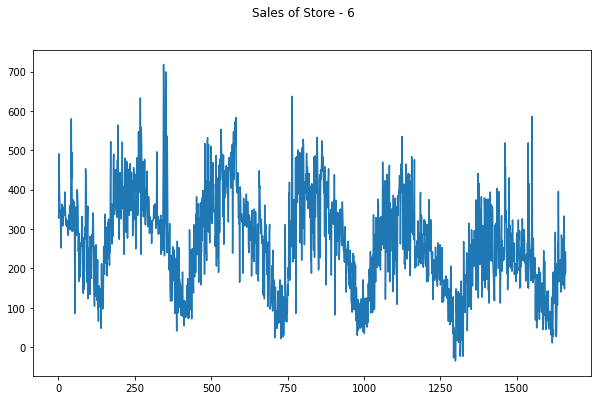

(1661, 1)


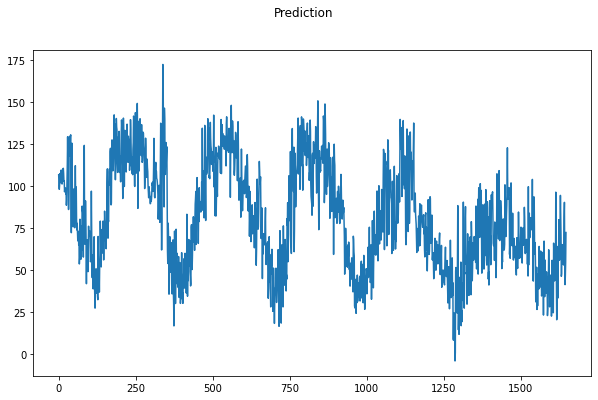

(1647, 20) (1647, 1)
_____STORE NUM. 7_____


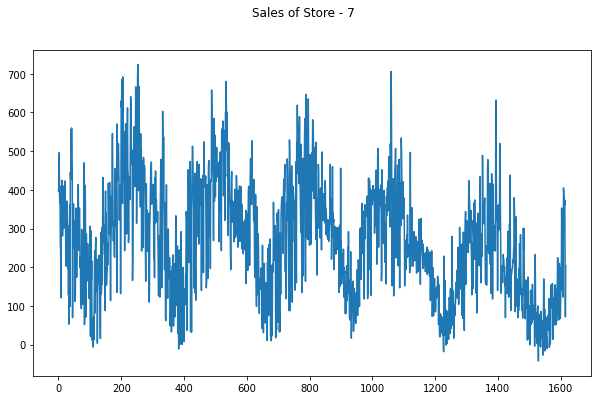

(1617, 1)


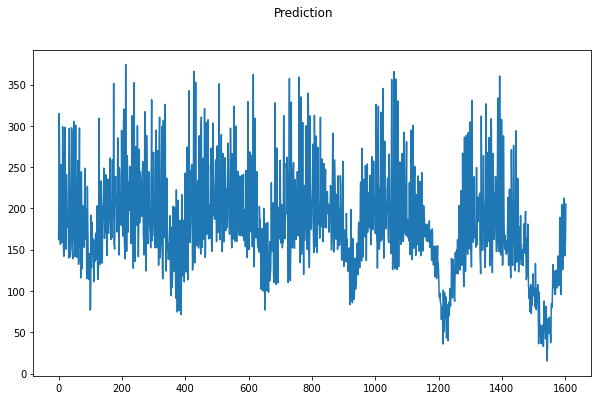

(1603, 20) (1603, 1)
_____STORE NUM. 8_____


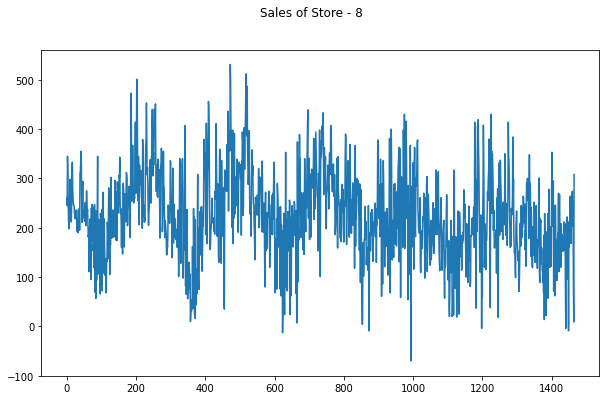

(1466, 1)


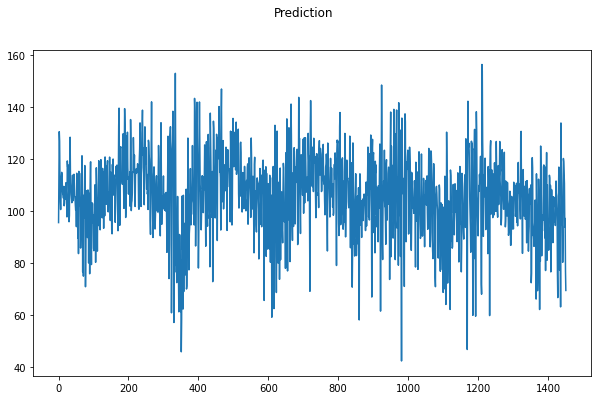

(1452, 20) (1452, 1)
_____STORE NUM. 9_____


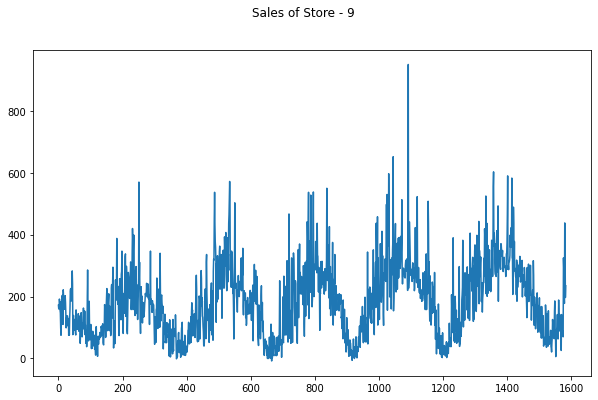

(1583, 1)


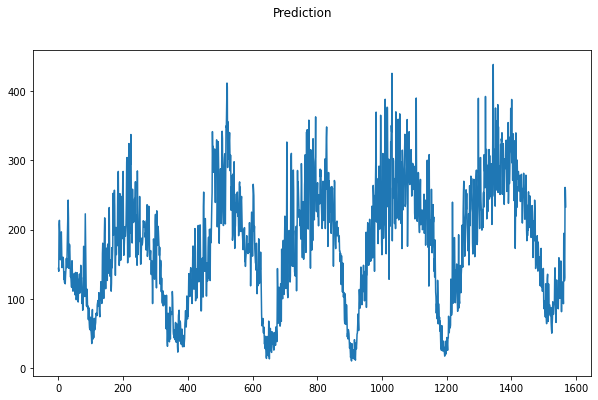

(1569, 20) (1569, 1)
_____STORE NUM. 10_____


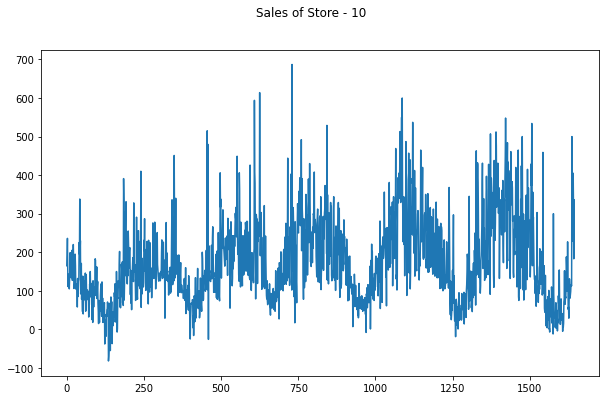

(1645, 1)


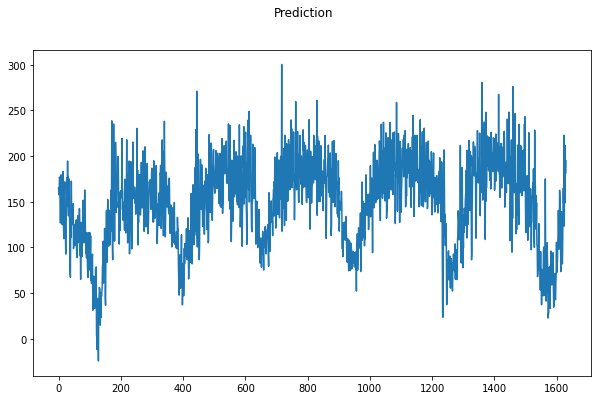

(1631, 20) (1631, 1)
_____STORE NUM. 11_____


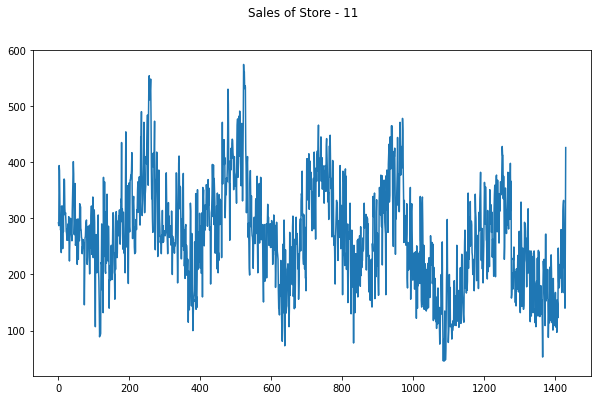

(1431, 1)


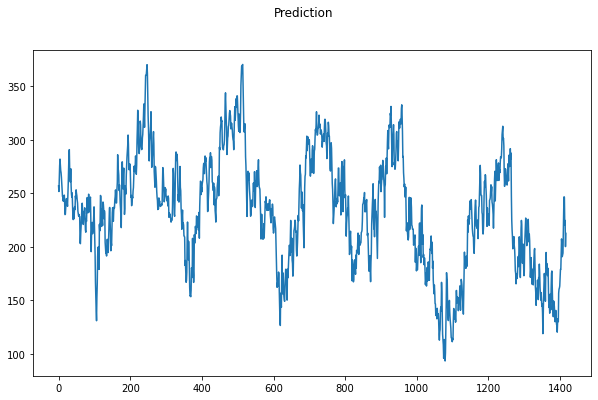

(1417, 20) (1417, 1)
_____STORE NUM. 12_____


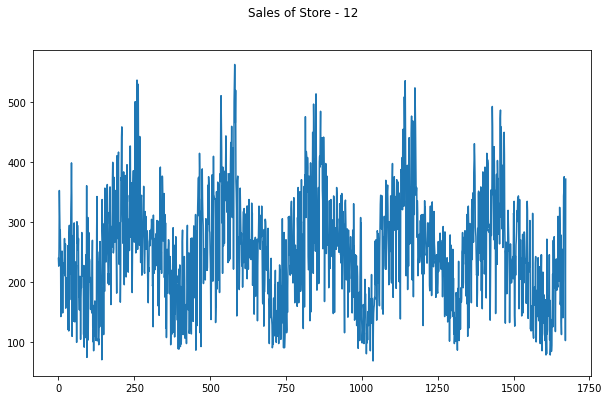

(1673, 1)


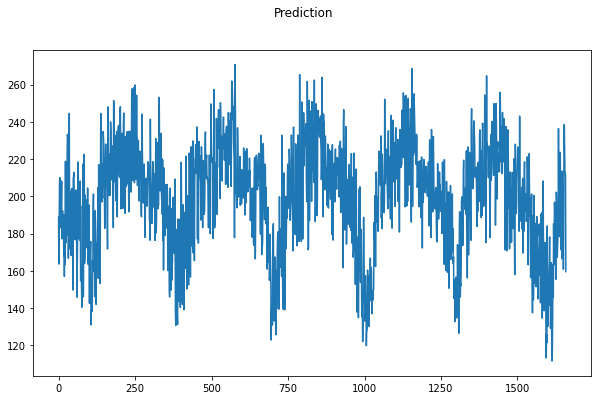

(1659, 20) (1659, 1)
_____STORE NUM. 13_____


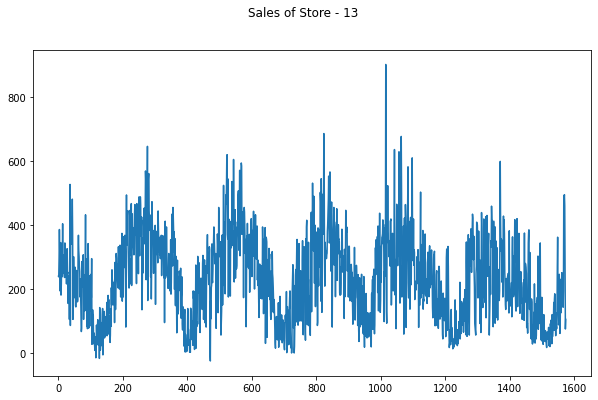

(1574, 1)


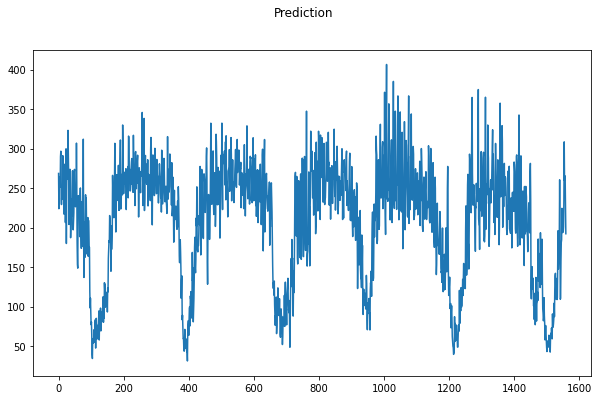

(1560, 20) (1560, 1)
_____STORE NUM. 14_____


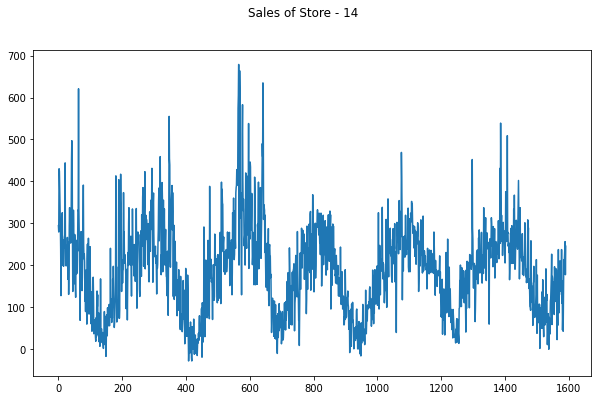

(1591, 1)


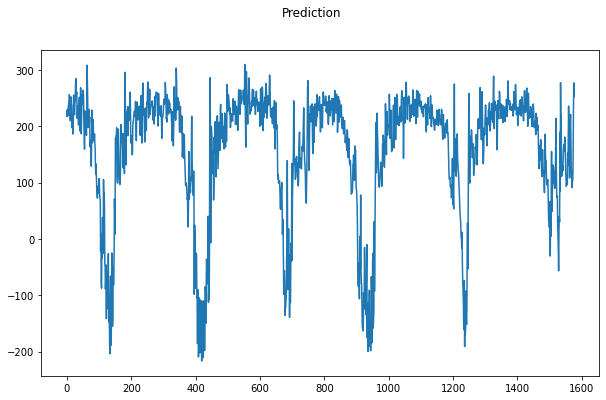

(1577, 20) (1577, 1)
_____STORE NUM. 15_____


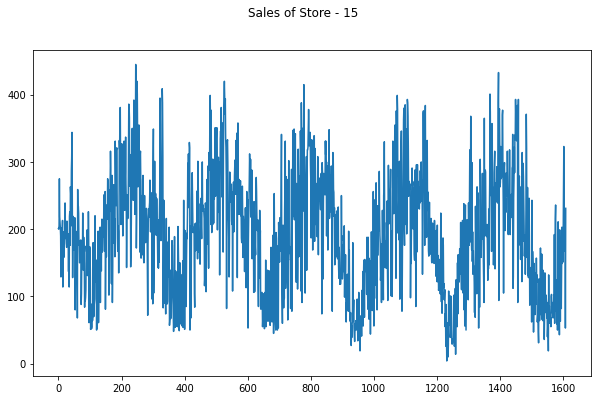

(1609, 1)


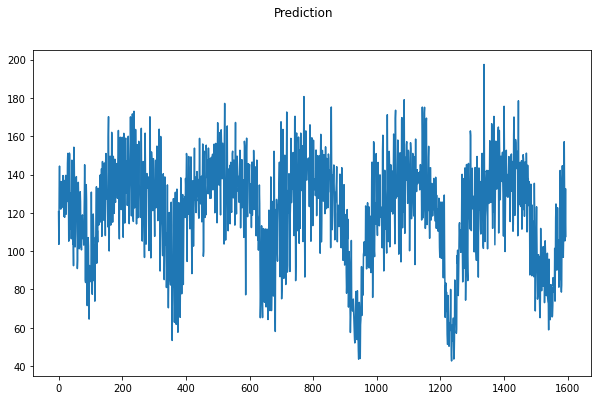

(1595, 20) (1595, 1)
_____STORE NUM. 16_____


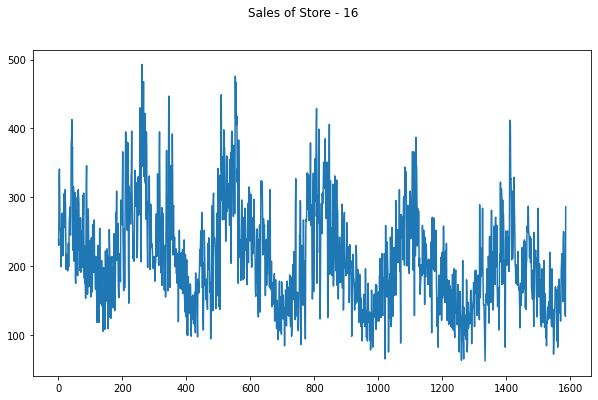

(1587, 1)


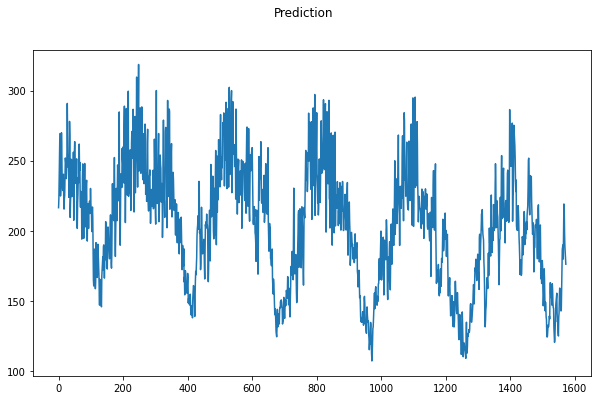

(1573, 20) (1573, 1)
_____STORE NUM. 17_____


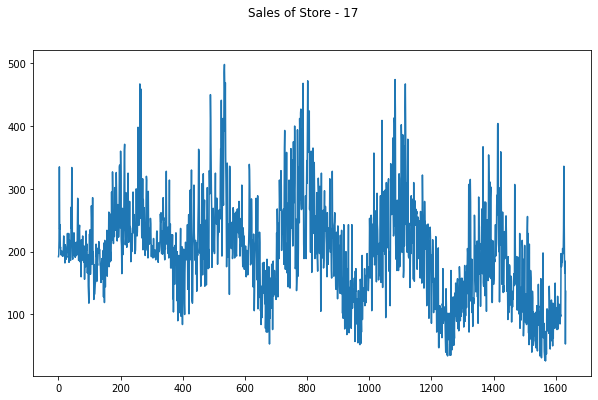

(1633, 1)


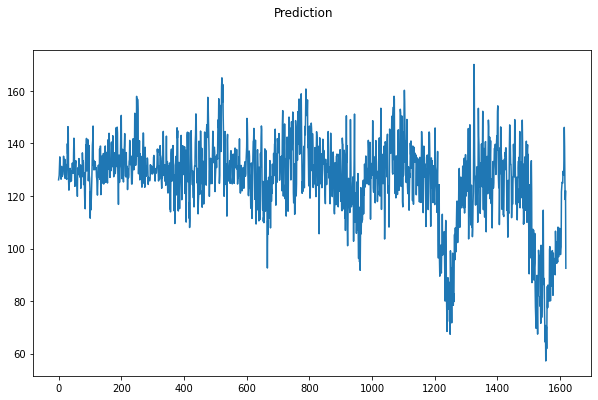

(1619, 20) (1619, 1)
_____STORE NUM. 18_____


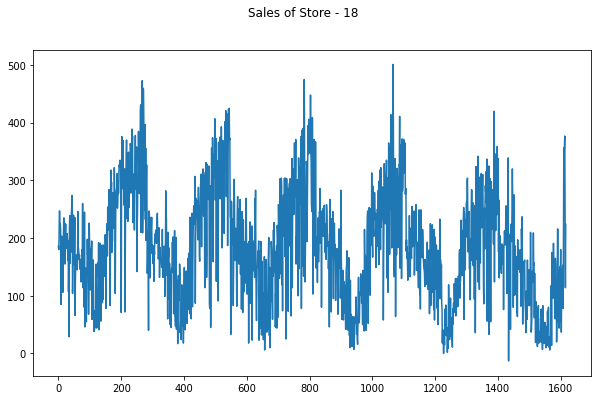

(1617, 1)


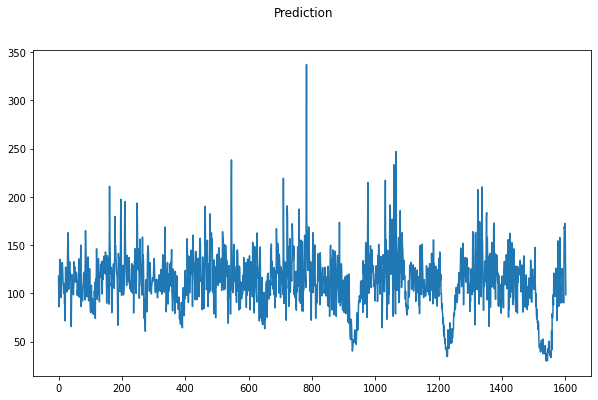

(1603, 20) (1603, 1)
_____STORE NUM. 19_____


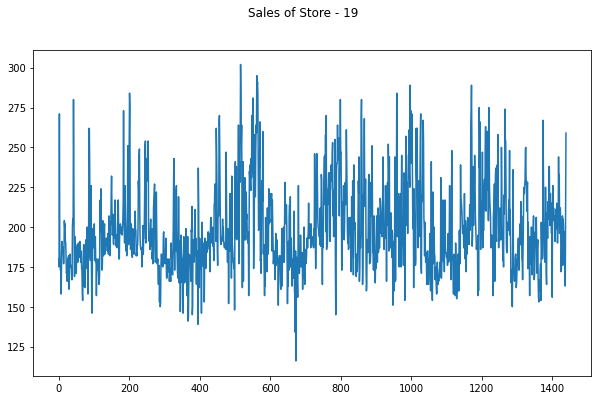

(1440, 1)


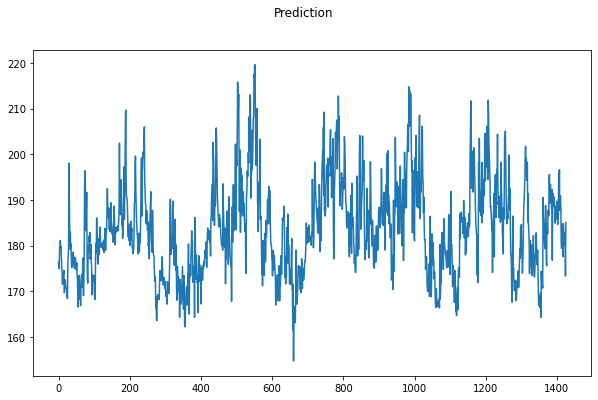

(1426, 20) (1426, 1)
_____STORE NUM. 20_____


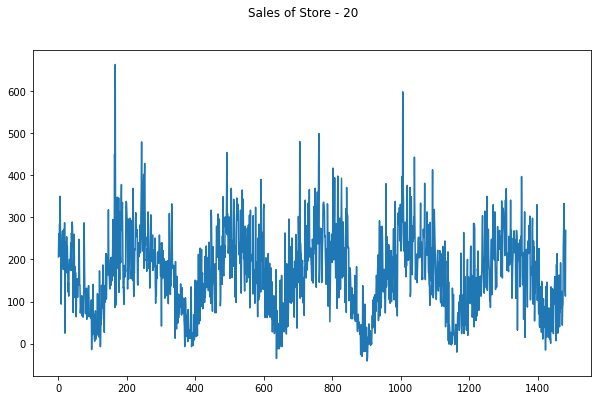

(1483, 1)


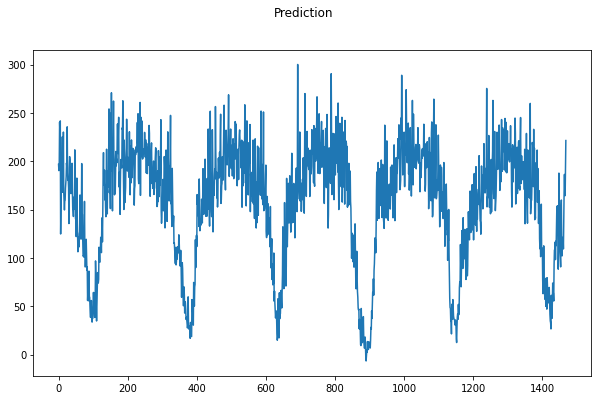

(1469, 20) (1469, 1)


In [253]:
for store in range(1,21):
    forecast = pd.read_csv("./predictions/weatherAnalyzer/forecast/store_{}.csv".format(store))
    total = pd.read_csv("./predictions/weatherAnalyzer/total/store_{}.csv".format(store))
    dataset = pd.concat([total,forecast],ignore_index=True)
    
    print("_____STORE NUM. {}_____".format(store))
    
    PATH = "./LSTM - Sales Pattern Analyzer/saved-models/model-1/saved_model_store_{}.pth".format(store)
    lstm1 = LSTM()
    lstm1.load_state_dict(torch.load(PATH))
    lstm1.eval()

    training_set = dataset.iloc[:,-1:].values
    
    plt.figure(figsize=(10,6))
    plt.plot(training_set, label = 'Sales')
    plt.suptitle('Sales of Store - {}'.format(store))
    plt.show()

    sc = MinMaxScaler()
    print(training_set.shape)
    training_data = sc.fit_transform(training_set)

    seq_length = 14
    x = sliding_windows(training_data, seq_length)
    

    dataX = Variable(torch.Tensor(np.array(x)))


    train_predict = lstm1(dataX)

    data_predict = train_predict.data.numpy()

    data_predict = sc.inverse_transform(data_predict)

    plt.figure(figsize=(10,6))

    plt.plot(data_predict)
    plt.suptitle('Prediction')
    plt.show()
    
    print(dataset.iloc[14:].shape, data_predict.shape)
    
    output_dataset = dataset.iloc[14:,:].copy()
    forecast_dataset = dataset.iloc[-16:,:].copy()
    
    output_dataset["FORECAST_2"] = data_predict.astype(int)
    forecast_dataset["FORECAST_2"] = data_predict[-16:].astype(int)
    
    output_dataset.to_csv("./predictions/salesAnalyzer/total/store_{}.csv".format(store),index=False)
    forecast_dataset.to_csv("./predictions/salesAnalyzer/forecast/store_{}.csv".format(store),index=False)
    
    

# IBM Cloud